# Named Entity Recognition with Python and Hex

This Jupyter Notebook (`named_entity_recognition.ipynb`) demonstrates how to perform **Named Entity Recognition (NER)** using Python and Hex. NER is a Natural Language Processing (NLP) task that involves identifying and classifying named entities in text into predefined categories, such as:
- **Person** (e.g., "Albert Einstein")
- **Organization** (e.g., "NASA")
- **Location** (e.g., "Paris")
- **Date/Time** (e.g., "January 8, 2025")
- **Monetary Values** (e.g., "$1000")

In [5]:
import spacy
import pandas as pd


# using a pre-trained NER model
nlp = spacy.load("en_core_web_sm")

# Apply the model on text
# text = "Barack Obama was born in Hawaii and became the President of the United States."

# Read the text file
with open(r"C:\Users\dbigman\OneDrive - SUDOC LLC\Desktop\Desktop Cleanup\Harry Potter\Book 1 - The Philosopher's Stone.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Apply NER
doc = nlp(text)

# Extract entities and labels into a list of tuples
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Create a DataFrame with two columns: "Entity" and "Label"
entities_df = pd.DataFrame(entities, columns=["Entity", "Label"])

In [ ]:
# Named Entity Types

# | **Label**       | **Description**                                                                 |
# |------------------|---------------------------------------------------------------------------------|
# | **PERSON**       | People, including fictional characters (e.g., "Barack Obama").                 |
# | **NORP**         | Nationalities, religious groups, or political groups (e.g., "American").       |
# | **FAC**          | Buildings, airports, highways, bridges, etc. (e.g., "Empire State Building").  |
# | **ORG**          | Organizations, companies, agencies, institutions (e.g., "Google", "UN").       |
# | **GPE**          | Countries, cities, or states (e.g., "Hawaii", "France").                       |
# | **LOC**          | Non-GPE locations, mountain ranges, bodies of water (e.g., "Mount Everest").   |
# | **PRODUCT**      | Objects, vehicles, foods, etc. (not services) (e.g., "iPhone").                |
# | **EVENT**        | Named events (e.g., "World War II").                                           |
# | **WORK_OF_ART**  | Titles of books, songs, films, etc. (e.g., "The Great Gatsby").                |
# | **LAW**          | Named documents made into laws (e.g., "First Amendment").                     |
# | **LANGUAGE**     | Any named language (e.g., "English", "Spanish").                               |
# | **DATE**         | Absolute or relative dates or periods (e.g., "July 4, 2023", "next Monday").   |
# | **TIME**         | Times smaller than a day (e.g., "2:30 PM", "midnight").                        |
# | **PERCENT**      | Percentage values (e.g., "45%").                                               |
# | **MONEY**        | Monetary values, including currency (e.g., "$5", "EUR 10 million").            |
# | **QUANTITY**     | Measurable quantities (e.g., "3 cups", "5 kilometers").                        |
# | **ORDINAL**      | "First", "second", etc.                                                        |
# | **CARDINAL**     | Numerals that do not fall under other categories (e.g., "one", "100").         | -->


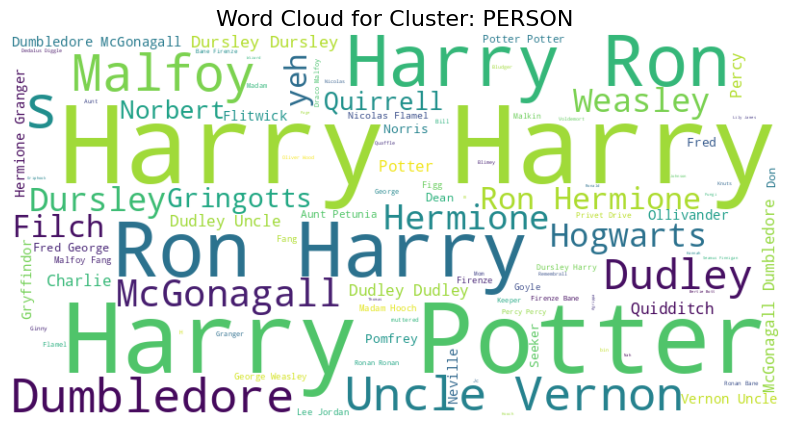

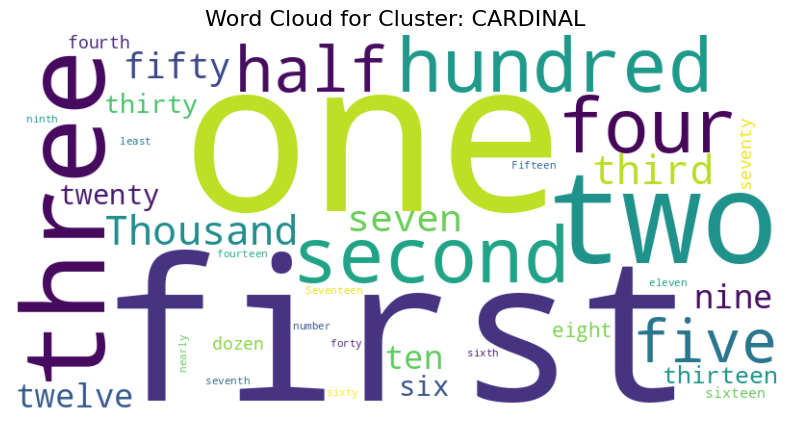

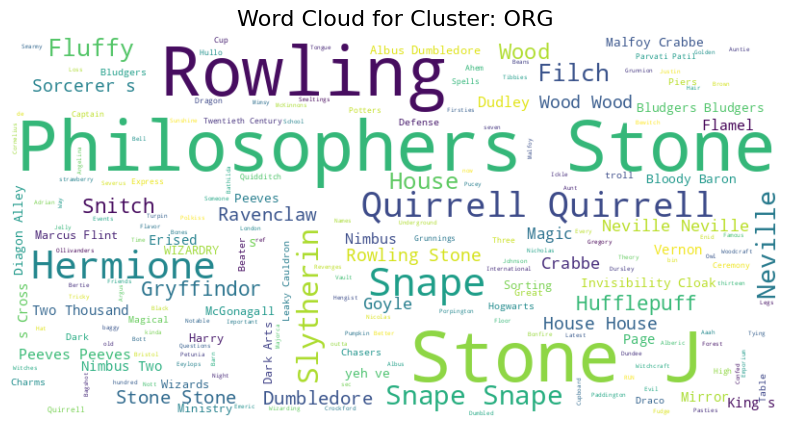

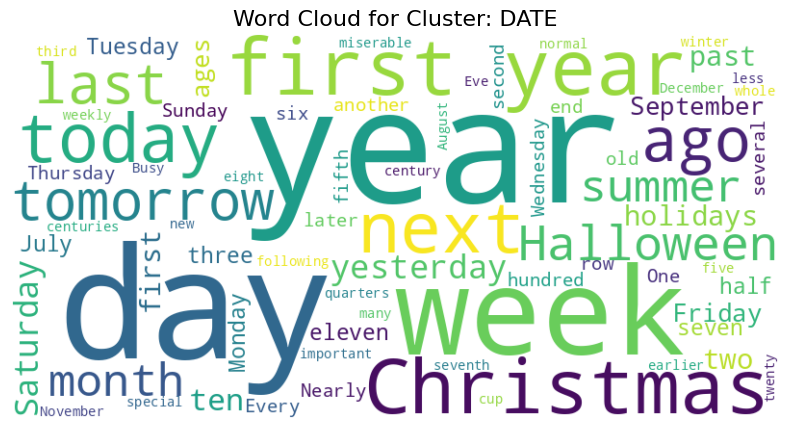

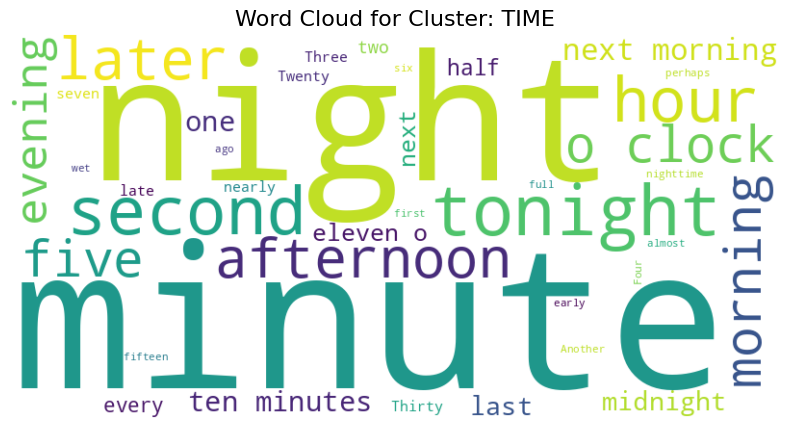

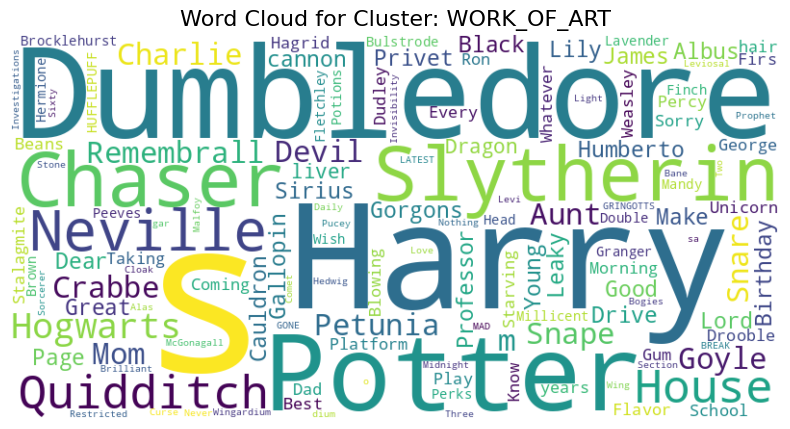

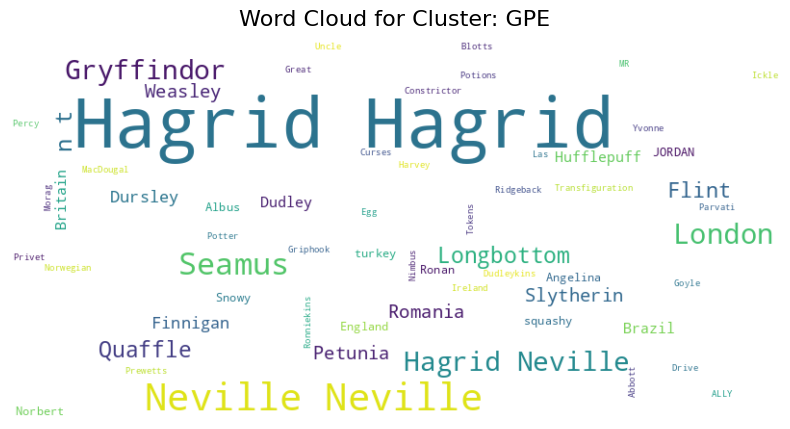

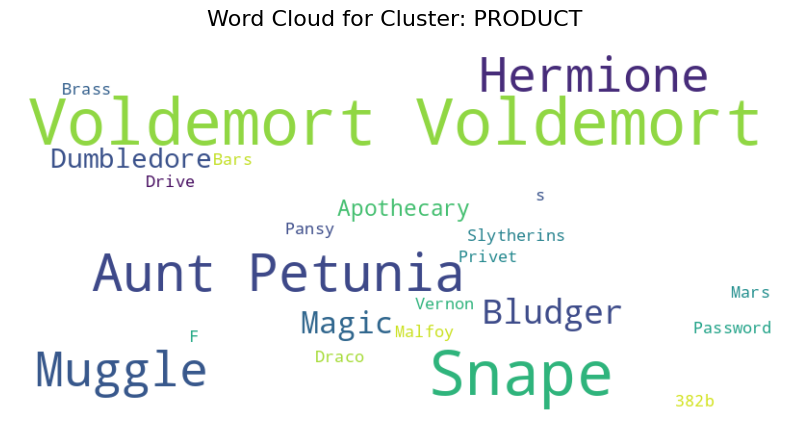

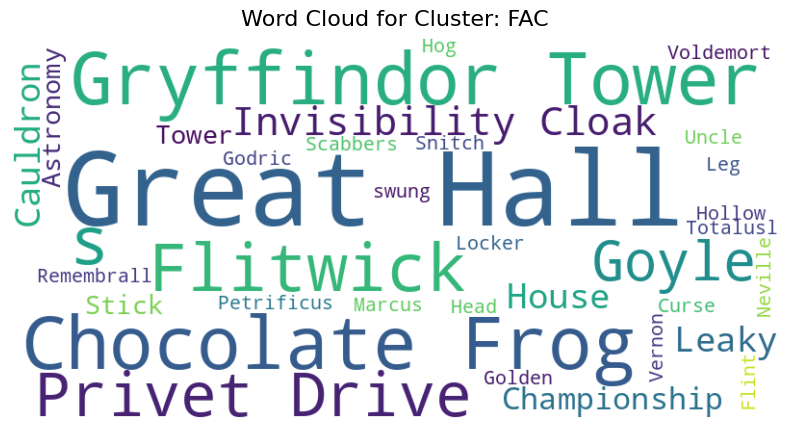

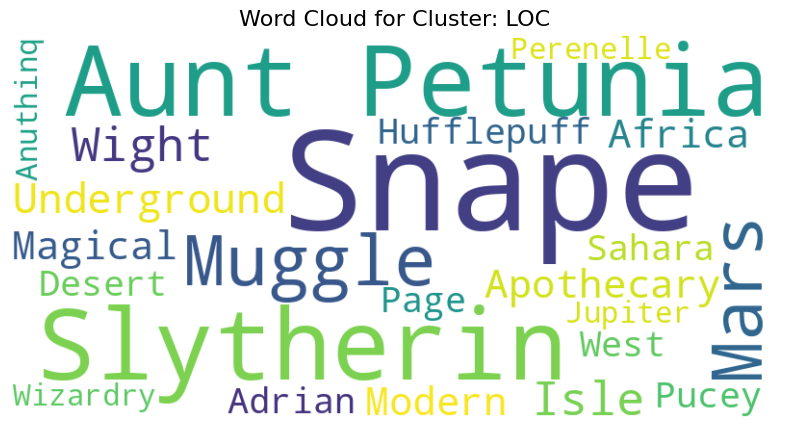

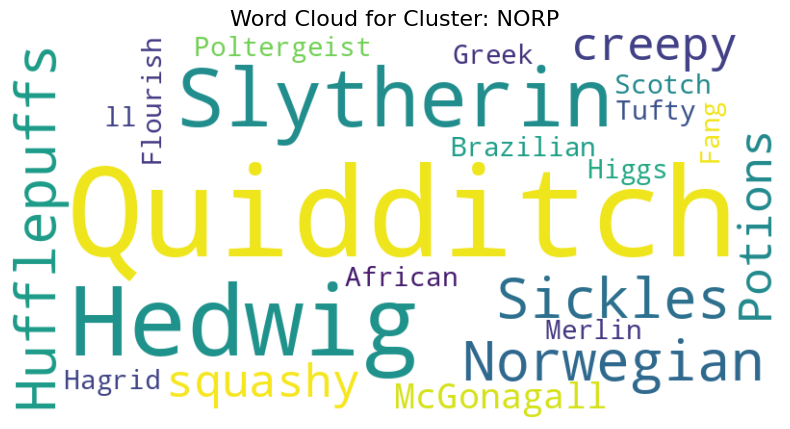

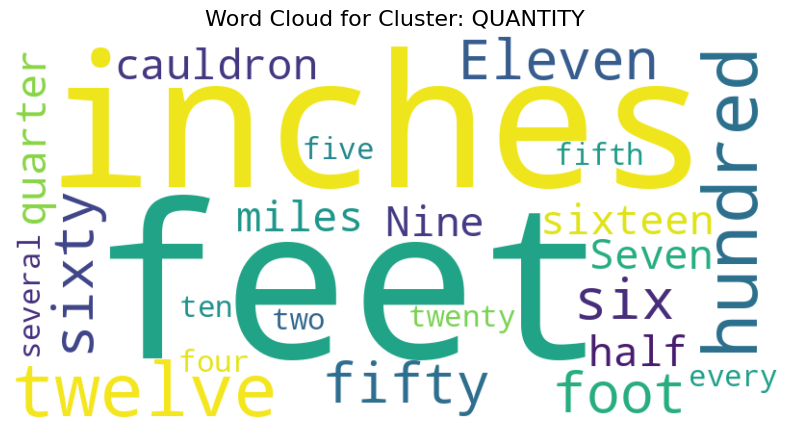

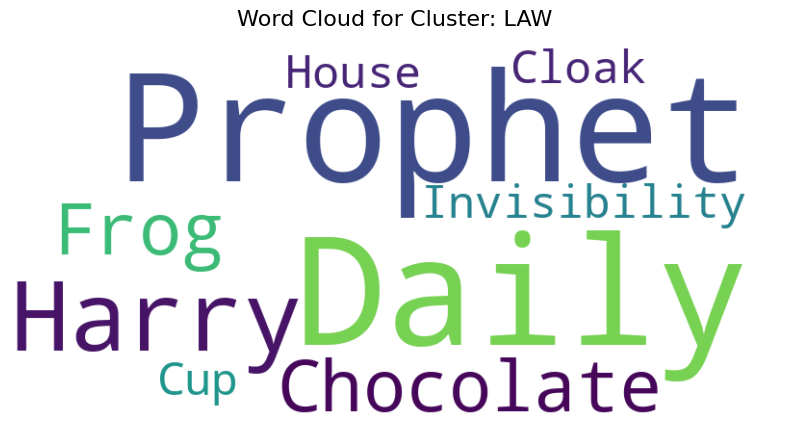

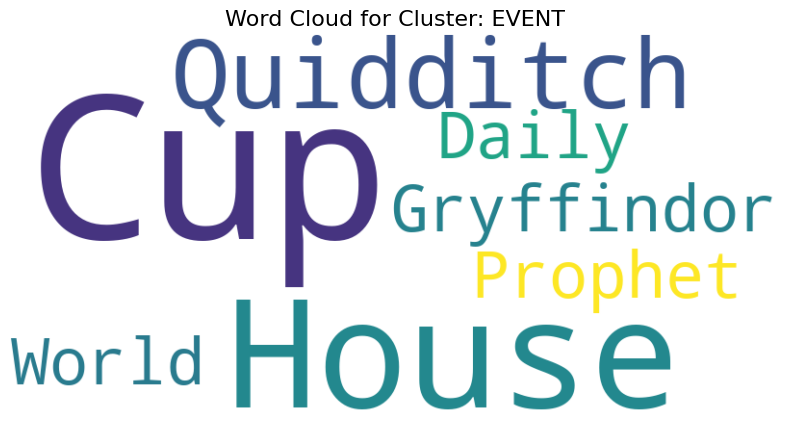

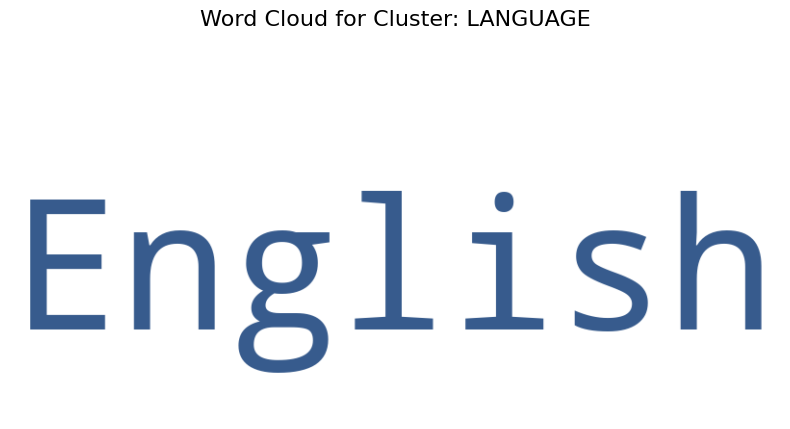

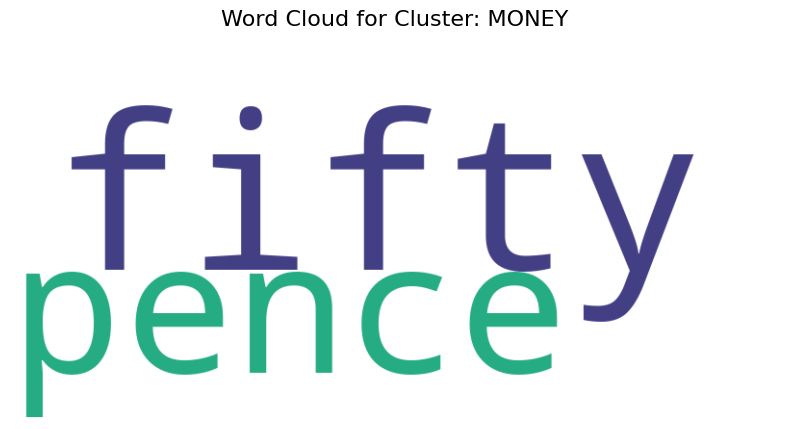

In [8]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Clustering with Fuzzy Matching:
# Labels with similarity ratios above the threshold are grouped into the same cluster.
# define a similarity threshold for fuzzy matching

SIMILARITY_THRESHOLD = 70

# Initialize clusters
clusters = {}

# Group labels fuzzily
for label in entities_df['Label'].unique():
    # Find the best match from existing clusters
    best_match = None
    for cluster_label in clusters.keys():
        if fuzz.ratio(label, cluster_label) >= SIMILARITY_THRESHOLD:
            best_match = cluster_label
            break
    
    # Assign to the cluster or create a new one
    if best_match:
        clusters[best_match].append(label)
    else:
        clusters[label] = [label]

# Generate word clouds for each cluster
for cluster_label, grouped_labels in clusters.items():
    # Filter entities for all labels in the cluster
    cluster_entities = entities_df[entities_df['Label'].isin(grouped_labels)]['Entity']
    
    # Combine all entities into a single string
    text = " ".join(cluster_entities)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Cluster: {cluster_label}", fontsize=16)
    plt.show()